In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

### 1. Answer with the type of test you would use (assume normal distribution):


#### Is there a difference in grades of students on the second floor compared to grades of all students?

In [2]:
# 1 sample: students on the second floor compared to ALL students
# Looking for the difference, not if the means are greater or less
# than so we have a two_tailed test

# stats.ttest_1samp(a, popmean)

# a being the array of numerical values of your sample
# popmean being the mean of the total population 

In [3]:
stats.ttest_1samp?

#### Are adults who drink milk taller than adults who dont drink milk?

In [4]:
# 2 samples: adults who drink milk vs adults who do not drink milk
# We are looking to see if the mean height of adults who drink 
# milk is greater than the mean height of adults who do not
# This is a one-tailed test

# stats.ttest_ind(a_smaller, a_larger, equal_var=True) 

# a_smaller being the array that holds the heights of adults
# who do not drink milk
# a_larger being the array that holds the heights of adults 
# who do drink milk

#### Is the the price of gas higher in texas or in new mexico?

In [5]:
# 2 samples: gas prices in TX vs gas prices in NM
# We are looking to see if the gas prices are greater in one state 
# over the other
# This is a one_tailed test

# stats.ttest_ind(a_smaller, a_larger, equal_var=True)

# a_smaller being the array which holds TX gas prices
# a_larger being the array which holds NM gas prices


In [6]:
stats.ttest_ind?

#### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [7]:
# 3 samples: ANOVA test type

# stats.f_oneway(data_science_array, web_dev_array, cloud_array)

In [8]:
stats.f_oneway?

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [9]:
# 2 samples independent of each other: 
# office_1 with 40 samples, a mean of 90 days and a std of 15
# office_2 with 50 samples, a mean of 100 days and a std of 20

# We are looking if the two means are different so this is 
# a one_tailed test

# Remember, for a two-tailed test: p < α IOT reject Ho 

In [10]:
μ1 = 90
σ1 = 15
sample_size1 = 40

office_1_dis = np.random.normal(μ1, σ1, size=sample_size1,).astype(int)

In [11]:
μ2 = 100
σ2 = 20
sample_size2 = 50

office_2_dis = np.random.normal(μ2, σ2, size=sample_size2).astype(int)

In [12]:
office_1_dis

array([ 94,  91,  70,  83,  94,  95,  85,  74,  70, 116,  90, 100,  87,
       104,  93,  67,  91,  98,  99,  88, 107, 102,  82, 109,  47,  72,
        61,  73, 124,  98,  94, 100,  78,  96,  96,  81, 112,  81,  75,
        97])

In [13]:
# STEP 1: Plot the Samples in Histograms

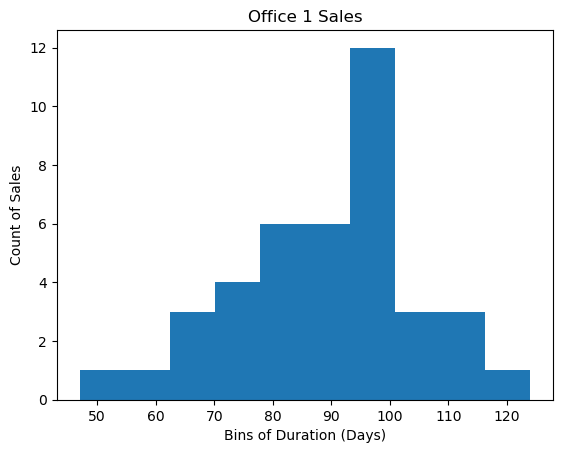

In [14]:
plt.hist(office_1_dis)
plt.xlabel('Bins of Duration (Days)')
plt.ylabel('Count of Sales')
plt.title('Office 1 Sales')
plt.show()

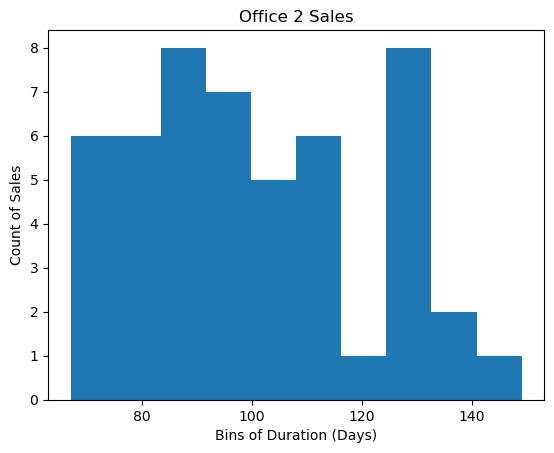

In [15]:
plt.hist(office_2_dis)
plt.xlabel('Bins of Duration (Days)')
plt.ylabel('Count of Sales')
plt.title('Office 2 Sales')
plt.show()

In [16]:
# STEP 2: Set Hypotheses

# Ho: The average time it takes to sell a home is not different
# between office 1 and office 2.

# Ha: The average time it takes to sell a home is different between
# office 1 and office 2.

In [17]:
# STEP 3: Set the alpha

α = 0.05

In [18]:
# STEP 4: Verify assumptions

# Independent: YES!

# Normality: at least 30 observations, YES!

# Variance: Lets check!

In [19]:
sub_α = 0.05

# sub_Ho: sales between offices 1 and 2 have equal variance.
# sub_Ha: sales between offices 1 and 2 have inequal variance.

In [20]:
stat, sub_p = stats.levene(office_1_dis, office_2_dis)

In [21]:
sub_p < α

# the levene p is less than alpha so we cannot reject the Ho
# We can say now that the two distributions have equal variance

# Variance: YES!

# and can therefore move on to our t-test

True

In [22]:
# STEP 5: Compute Test Statistic

t_stat, p_val = stats.ttest_ind(office_1_dis, 
                                office_2_dis,
                                equal_var=True)

In [23]:
t_stat

-2.763307552622008

In [24]:
p_val

0.006967294412401273

In [25]:
# STEP 6: Decide

# Two-tailed so we must check that p < alpha = we can reject the Ho

In [26]:
p_val < α

True

In [27]:
# Because the p_value is less than alpha, we must reject the
# Null Hypothesis

# Ha: The average time it takes to sell a home IS different between
# office 1 and office 2.

## ORRRRR

Text(0.5, 1.0, 'Sales in Offices 1 and 2')

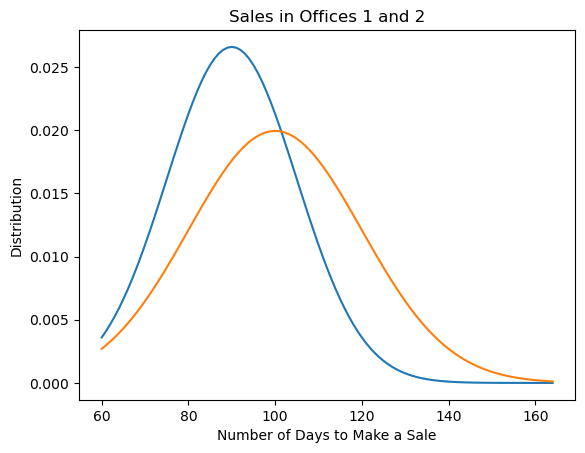

In [28]:
x = np.arange(60, 165)
y = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.xlabel('Number of Days to Make a Sale')
plt.ylabel('Distribution')
plt.title('Sales in Offices 1 and 2')

In [29]:
# Set Hypotheses

# Ho: There is NOT a difference in the sales time between office 1 and 2

# Ha: There is a difference in the sales time between office 1 and 2

In [30]:
# we have a two-tailed, two sample test

In [31]:
μ1 = 90
σ1 = 15
sample_size1 = 40

μ2 = 100
σ2 = 20
sample_size2 = 50

In [32]:
t_stat, p_val = stats.ttest_ind_from_stats(mean1 = μ1,
                           std1 = σ1,
                           nobs1 = 40,
                           mean2 = μ2,
                           std2 = σ2,
                           nobs2 = 50)

In [33]:
α = 0.05

In [34]:
p_val < α

True

In [35]:
# If the p value is less than alpha, we can reject the null
# hypothesis

In [36]:
if p_val < α:
    print('We can reject the Null Hypothesis, and we can conclude that the average time it takes to sell a home is different between office 1 and office 2.')
else:
    print('We cannot reject the Null Hypothesis.')

We can reject the Null Hypothesis, and we can conclude that the average time it takes to sell a home is different between office 1 and office 2.


### 3. Load the mpg dataset and use it to answer the following questions:

In [37]:
mpg = data('mpg')

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [38]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [39]:
# Two samples for testing: 1999 cars and 2008 cars
# We want to know if there's a difference so we have a two-tailed
# test --> p < α

# stats.ttest_ind(1999_mpg, 2008_mpg)



In [40]:
# STEP 1: Create histograms of the two samples' distributions

In [41]:
mpg['fe'] = stats.hmean((mpg['hwy'], mpg['cty']))

In [42]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [43]:
old_cars = mpg[mpg.year == 1999].fe

In [44]:
newer_cars = mpg[mpg.year == 2008].fe

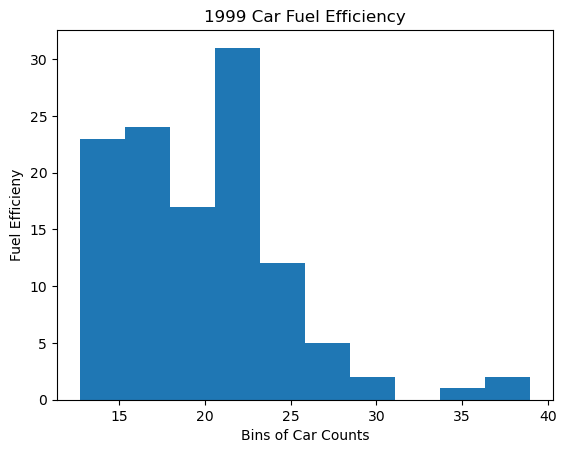

In [45]:
plt.hist(old_cars)
plt.xlabel('Bins of Car Counts')
plt.ylabel('Fuel Efficieny')
plt.title('1999 Car Fuel Efficiency')
plt.show()

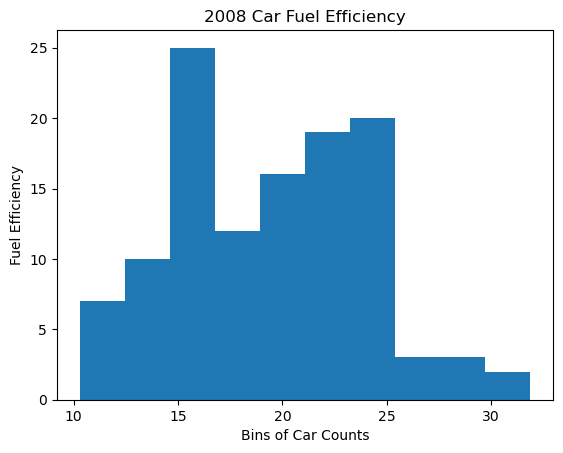

In [46]:
plt.hist(newer_cars)
plt.xlabel('Bins of Car Counts')
plt.ylabel('Fuel Efficiency')
plt.title('2008 Car Fuel Efficiency')
plt.show()

In [47]:
# STEP 2: Set Hypotheses

# Ho: There is not a difference in the fuel-efficiency in cars
# from 2008 vs 1999

# Ha: There is a difference in the fuel-efficiency in cars
# from 2008 vs 1999

In [48]:
# STEP 3: Set the alpha

α = 0.05

In [49]:
# STEP 4: Verify assumptions

# Independent: YES!

# Normality: at least 30 observations, YES!

# Variance: Lets check!

In [50]:
sub_α = 0.05

# sub_Ho: average mileage between 1999 and 2008 cars have
# equal variance.
# sub_Ha: average mileage between 1999 and 2008 cars have
# inequal variance.

In [51]:
stat, sub_p = stats.levene(old_cars, newer_cars)

In [52]:
sub_p < α

# the levene p is not less than alpha so we cannot reject the Ho
# We can say now that the two distributions have equal variance

# Variance: YES!

# and can therefore move on to our t-test

False

In [53]:
# STEP 5: Compute Test Statistic

t_stat, p_val = stats.ttest_ind(old_cars, 
                                newer_cars,
                                equal_var=True)

In [54]:
# STEP 6: Decide

# Two-tailed so we must check that p < alpha = we can reject the Ho

p_val < α

False

In [55]:
# Because the p_value is NOT less than alpha, we cannot reject the
# null hypothesis

# Ho: There is not a difference in the fuel-efficiency in cars
# from 2008 vs 1999

#### Are compact cars more fuel-efficient than the average car?

In [56]:
# Lets form our hypothesis:

# Ho: Compact cars are less or equally fuel efficient than the 
# average car (fe <= avg_fe)

# Ha: Compact cars are more fuel_efficient than the average car 
# (fe > avg_fe)

In [57]:
mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [58]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [59]:
μ_overall = mpg['fe'].mean()

In [60]:
compact_cars = mpg[mpg['class'] == 'compact'].fe

In [61]:
α = 0.05

In [62]:
t_stat, p_val = stats.ttest_1samp(compact_cars, μ_overall)

In [63]:
if ((p_val / 2) and (t_stat > 0)):
    print('We can reject the Null Hypothesis!')
    print('There is evidence that the alternative hypothesis is true')
else:
    print('We fail to reject the Null Hypothesis')

We can reject the Null Hypothesis!
There is evidence that the alternative hypothesis is true


In [64]:
# Ha: Compact cars are more fuel_efficient than the average car

#### Do manual cars get better gas mileage than automatic cars?

In [65]:
# H0:  Manual cars have worse or equal gas mielage to automatic

# Ha: Manual cars have better gas mielage than automatic

In [66]:
# two samples: auto and manual
# greater than/less than: one_sided
# stats.ttest_ind

In [67]:
manual_fe = mpg[mpg.trans.str.startswith('man')].fe
auto_fe = mpg[mpg.trans.str.startswith('auto')].fe

In [68]:
stats.levene(manual_fe, auto_fe)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [69]:
# fail to reject Ho: presume that variance is equal

In [70]:
t_stat, p_val = stats.ttest_ind(auto_fe, manual_fe)

In [71]:
p_val

5.510464610044009e-06

In [72]:
# p_val is less than our alpha

In [73]:
t_stat

-4.652577547151351

In [74]:
# t_stat > 0:

In [75]:
# we met both conditions so we can reject Ho and say that there
# is a difference

# Ha: Manual cars receive better gas mileage than automatic vehicles

# Correlation

In [76]:
# vectorized operations and numerical calcs
import numpy as np
# tabular data window dressing and syntax
import pandas as pd
# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# data cource
from pydataset import data
import scipy.stats as stats

In [77]:
swiss = data('swiss')

In [78]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


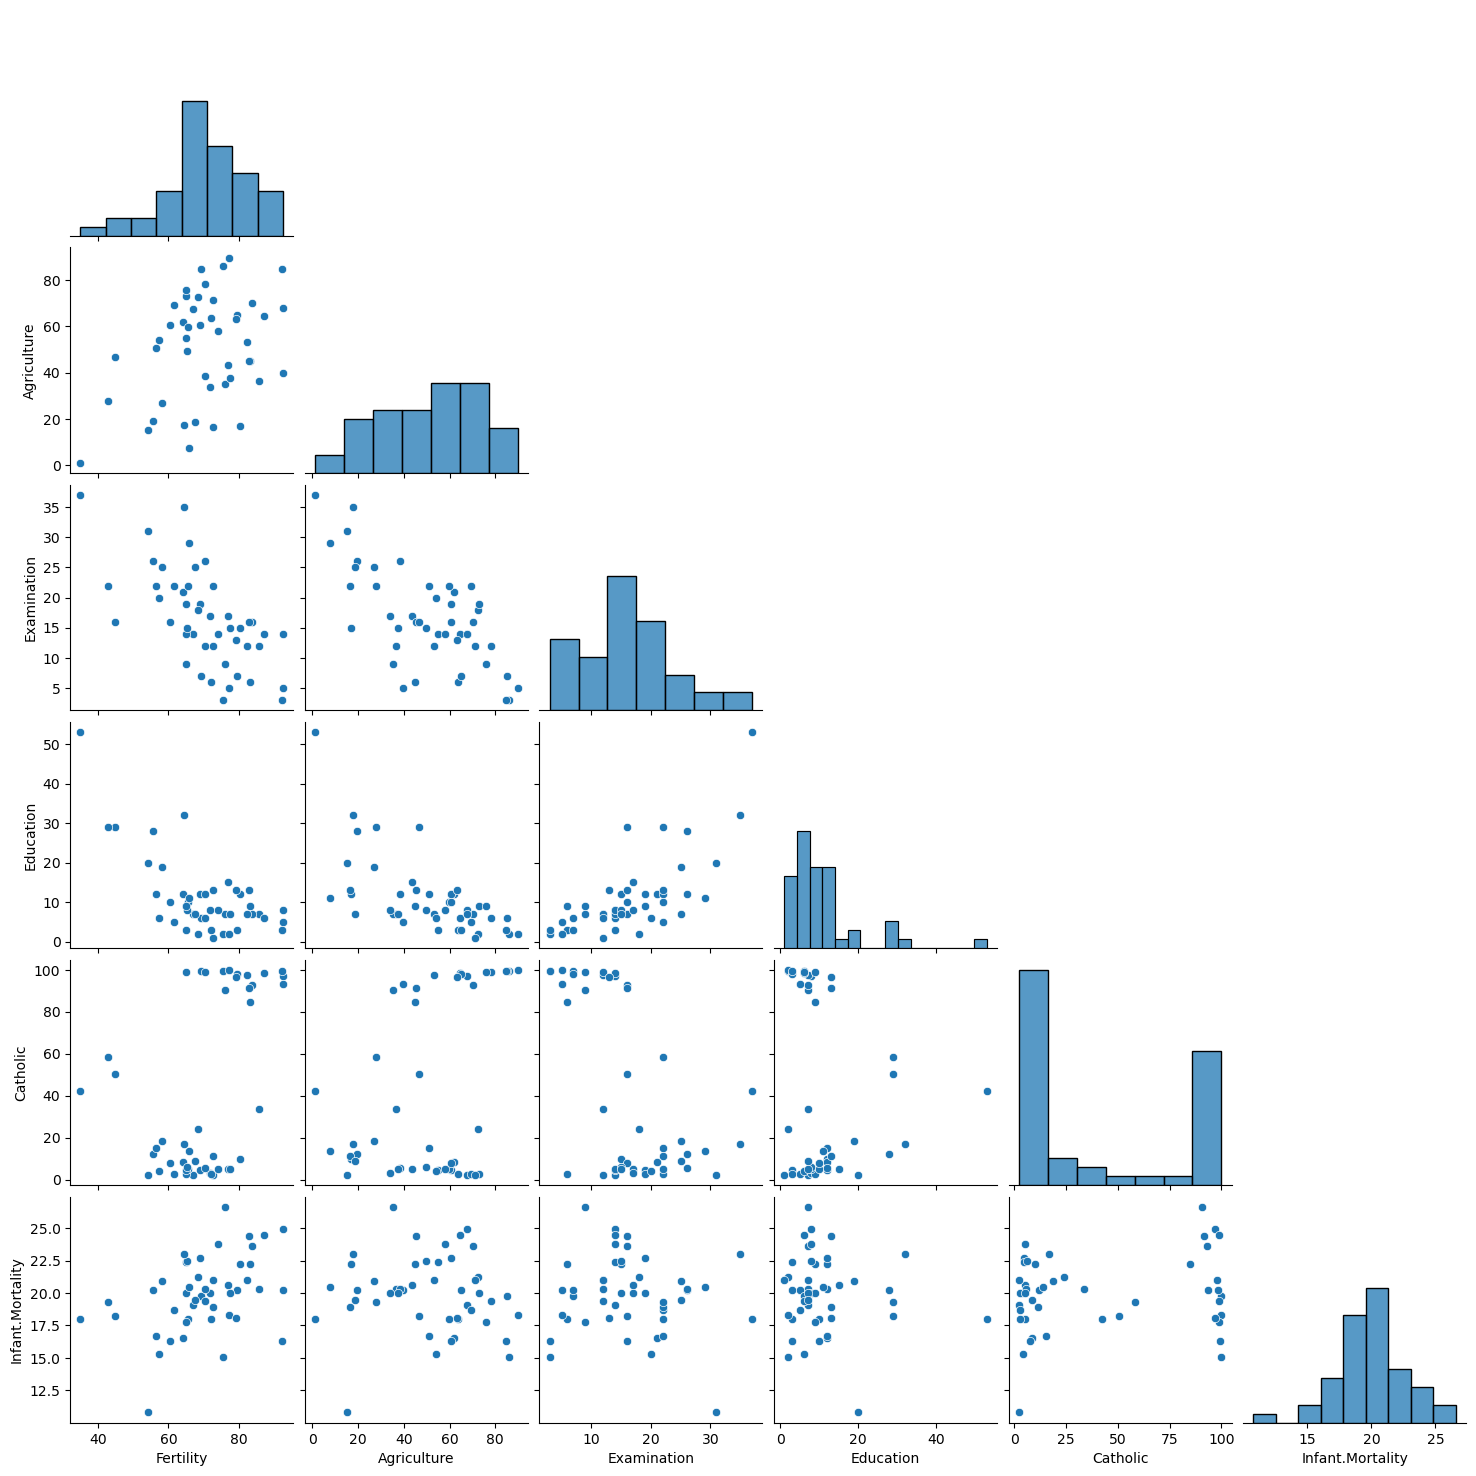

In [79]:
sns.pairplot(swiss, corner = True)

In [80]:
# lets look at agriculture vs examination
# and fertility vs examination

H$_0$: There is NO linear relationship between fertility and examination

H$_A$: There is a linear relationship between fertility and examination

In [81]:
fertility = swiss.Fertility

In [82]:
examination = swiss.Examination

In [83]:
corr, p = stats.pearsonr(fertility, examination)

In [84]:
corr

-0.6458827064572875

In [85]:
p

9.450437340690438e-07

In [86]:
α = 0.05
# confidence level = 95%

In [87]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


In [88]:
agriculture = swiss.Agriculture

In [89]:
examination = swiss.Examination

H$_O$: There is NO linear relationship between agriculture and examination

H$_A$: There is a linear relationship between agriculture and examination

In [90]:
corr, p = stats.pearsonr(agriculture, examination)

In [91]:
corr

-0.6865422086171364

In [92]:
p

9.951515271339796e-08

In [93]:
α = 0.05

In [94]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


H$_A$: There is a linear relationship between agriculture and examination

# Chi-Squared Testing of Categorical Information

In [95]:
mpg = data('mpg')

In [96]:
# when want to see if there is independence between two categorical
# variables

In [97]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [98]:
# lets look at 

In [99]:
pd.crosstab(mpg['year'], mpg['class'])

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
year,,,,,,,
1999,2,25,20,6,16,19,29
2008,3,22,21,5,17,16,33


In [100]:
mpg['auto_trans'] = mpg.trans.str.startswith('auto').astype(int)

In [101]:
pd.crosstab(mpg['year'], mpg['auto_trans'])

auto_trans,0,1
year,,
1999,43,74
2008,34,83


In [102]:
observed = pd.crosstab(mpg['year'], mpg['auto_trans'])

In [103]:
# we will create a table of counted observed values to test for the 
# chi-squared stat and ther associated p value

H$_O$: The variables year and transmission are independent of each other.

H$_A$: There is a relationship/dependency between vehicles manufacture year and vehicle transmission type


In [104]:
α = 0.05

In [105]:
stats.chi2_contingency(observed)

# this function needs to be fed the cross tabular data 
# of the two variableyou are comparing

(1.2388121432707422,
 0.2657001056392438,
 1,
 array([[38.5, 78.5],
        [38.5, 78.5]]))

In [106]:
# We get back four things:
# 1) the t_stat
# 2) p value
# 3) degrees of freedom: equivalent to sample size minus 1
# 4) expected values: what the proportions would look like if
# the two vars were completely independent and evenly distributed

In [107]:
if p < α:
    print('We can reject our null hypothesis')
    print(f'We can say that with a p value of {p} that these two categories are not inpdendent')
else: 
    print('We cannot reject the null hypothesis')

We can reject our null hypothesis
We can say that with a p value of 9.951515271339796e-08 that these two categories are not inpdendent


# Correlation Exercises

### 1. Answer with the type of stats test you would use (assume normal distribution):

#### Is there a relationship between the length of your arm and the length of your foot?

In [108]:
# Length of arm: continuous
# Length of leg: continuous
# TWO CONTINUOUS VARIABLES

# We want to test for a relationship

# ANSWER: Pearson's Correlation Coefficient

#### Do guys and gals quit their jobs at the same rate?

In [109]:
# 2 variables
# Guys: 0 or 1
# Gals: 0 or 1 

# Pearson's Correlation Coefficient

if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

# p < α --> True: we must reject the Null Hypothesis

We reject the null hypothesis


#### Does the length of time of the lecture correlate with a students grade?

In [110]:
# length of time: continuous
# students grade: continuous

# Pearson's Correlation Coefficient

if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

# p < α --> True: we must reject the Null Hypothesis

We reject the null hypothesis


In [111]:
import env

### 2. Use the telco_churn data.
Does tenure correlate with monthly charges?

In [112]:
url = env.get_db_url('telco_churn')

In [115]:
customers = pd.read_sql('select * from customers;', url)

In [116]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes
